# Mesh2d Basics

This is the basic introduction for using the `meshkernel` library.

`meshkernel` can be used for creating and manipulating various kinds of meshes.

The most common case deals with unstructured, two-dimensional meshes which is why this tutorial focuses on these.

At the very beginning, the necessary libraries have to be imported.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from meshkernel import Mesh2dFactory, MeshKernel

`meshkernel` provides a set of convenience methods for creating common meshes.

We use the `create_rectilinear_mesh` method to create simple meshes.
You can look at the documentation in order to find all its parameters.

In [2]:
mesh2d_input = Mesh2dFactory.create_rectilinear_mesh(3, 4)

`Mesh2dFactory`'s methods always return a `Mesh2D` instance.
`Mesh2D` has three mandatory attributes, which are enough to fully describe any unstructured mesh.

The first two are `node_x` and `node_y`.
They are one-dimensional `double` arrays, which describe the position of the nodes as can be seen below.

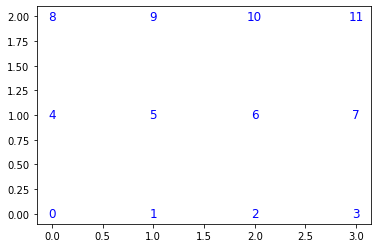

In [3]:
# Plot white points only for scaling the plot
plt.plot(mesh2d_input.node_x, mesh2d_input.node_y, "ow")

# Numbering the nodes
for i in range(mesh2d_input.node_x.size):
    plt.annotate(
        int(i),
        xy=(mesh2d_input.node_x[i], mesh2d_input.node_y[i]),
        ha="center",
        va="center",
        fontsize=12,
        color="blue",
    )

The third mandatory attribute is `edge_nodes`.
It describes the indices of the nodes that make up the edges.

Two indices describe one edge.
So in our case the indices 0-4, 1-5, 2-6, ... each describe one edge.

In [4]:
mesh2d_input.edge_nodes

array([ 0,  4,  1,  5,  2,  6,  3,  7,  4,  8,  5,  9,  6, 10,  7, 11,  1,
        0,  2,  1,  3,  2,  5,  4,  6,  5,  7,  6,  9,  8, 10,  9, 11, 10])

With all three parameters together we can plot the mesh.

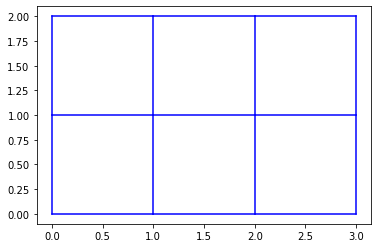

In [5]:
for edge_index in range(0, mesh2d_input.edge_nodes.size, 2):
    first_edge_node_index = mesh2d_input.edge_nodes[edge_index]
    second_edge_node_index = mesh2d_input.edge_nodes[edge_index + 1]

    edge_x = [
        mesh2d_input.node_x[first_edge_node_index],
        mesh2d_input.node_x[second_edge_node_index],
    ]
    edge_y = [
        mesh2d_input.node_y[first_edge_node_index],
        mesh2d_input.node_y[second_edge_node_index],
    ]

    plt.plot(edge_x, edge_y, "b-")

In order to interact with the `meshkernel` library, we create a new instance of the `MeshKernel` class.

The `is_geographic` parameter of its constructor describes whether the mesh is cartesian (`False`) or spherical (`True`). 

In [6]:
mk = MeshKernel(is_geographic=False)

Each instance holds it own state.
This state can be accessed with the corresponding getter and setter methods.

In [7]:
mk.set_mesh2d(mesh2d_input)

In [8]:
mesh2d_output_0 = mk.get_mesh2d()

We have now set mesh2d and immediately got it again, without asking `meshkernel` to execute any operations in between.

After we set the mesh2d, meshkernel calculated the face data and edge coordinates.

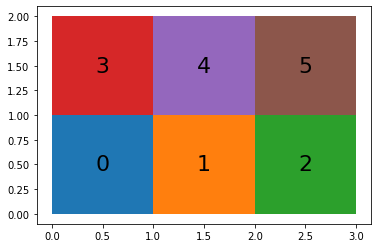

In [9]:
node_position = 0
for face_index, num_nodes in enumerate(mesh2d_output_0.nodes_per_face):
    # Calculate values to draw
    face_nodes = mesh2d_output_0.face_nodes[node_position : (node_position + num_nodes)]
    face_nodes_x = mesh2d_output_0.node_x[face_nodes]
    face_nodes_y = mesh2d_output_0.node_y[face_nodes]
    face_x = mesh2d_output_0.face_x[face_index]
    face_y = mesh2d_output_0.face_y[face_index]
    node_position += num_nodes

    # Draw polygon
    plt.fill(face_nodes_x, face_nodes_y)
    # Draw face index at its center
    plt.text(face_x, face_y, face_index, ha="center", va="center", fontsize=22)
plt.show()

`meshkernel` also searches for the middle point of edges and adds them as parameters to the `Mesh2D` class.

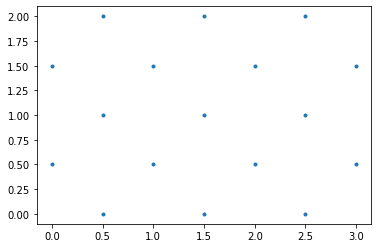

In [10]:
plt.plot(mesh2d_output_0.edge_x, mesh2d_output_0.edge_y, ".")
plt.show()